In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import wheel as wl
import sklearn as sl
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('C:\\Users\shani\Desktop\שנה ד סמסטר ב\לימוד מכונה ML\פרויקט חלק א ML/XY_train.csv')

In [3]:
only_fraud_ads_df = df[df['fraudulent'] == 1]
only_real_ads_df = df[df['fraudulent'] == 0]
df_no_null = df.fillna('')

In [4]:
def check_keywords(string, keywords):# checks if any of the words in a string appear in a list of keywords
    separators = r'[ \/*-_.:;!,&]+'  # regular expression that matches separators
    for word in re.split(separators, string):
        if word.lower() in keywords:
            return True
    return False

# Basic Data Information

In [5]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,7851,EROAD - Application Form,"NZ, ,",NaN,NaN,EROAD was established to modernise New Zealand...,Please complete our application form and submi...,NaN,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0
1,332,Application Security Consultant,"US, ,",Professional Services,NaN,Cylance is a global cybersecurity products and...,SummaryImmediate requirement for an advanced s...,QualificationsBachelor degree in Information T...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
2,5445,Executive Chef,"MY, 14, Kuala lumpur",NaN,65000-75000,Le Meridien is situated in the heart of kuala ...,Responsible for all food production including ...,Skills and Specifications:* Must have a passio...,NaN,0,1,0,Full-time,Executive,NaN,Hospitality,Other,1
3,7874,Digital Copywriter,"US, NY, New York",NaN,NaN,Kettle is an independent digital agency based ...,Kettle is a growing digital agency focused on ...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Online Media,Art/Creative,0
4,15471,PHP Developers,"NZ, , Auckland & Wellington",Fixed-term & Permanent,NaN,SilverStripe CMS &amp; Framework is an open so...,If you want to build world-class web applicati...,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.shape

(14304, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               14304 non-null  int64 
 1   title                14304 non-null  object
 2   location             14023 non-null  object
 3   department           5078 non-null   object
 4   salary_range         2313 non-null   object
 5   company_profile      11620 non-null  object
 6   description          14303 non-null  object
 7   requirements         12122 non-null  object
 8   benefits             8558 non-null   object
 9   telecommuting        14304 non-null  int64 
 10  has_company_logo     14304 non-null  int64 
 11  has_questions        14304 non-null  int64 
 12  employment_type      11536 non-null  object
 13  required_experience  8682 non-null   object
 14  required_education   7814 non-null   object
 15  industry             10375 non-null  object
 16  func

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000
mean,8932.742310,0.042785,0.793484,0.490282,0.049287
std,5147.650264,0.202380,0.404819,0.499923,0.216474
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4475.750000,0.000000,1.000000,0.000000,0.000000
50%,8917.500000,0.000000,1.000000,0.000000,0.000000
75%,13393.250000,0.000000,1.000000,1.000000,0.000000
max,17877.000000,1.000000,1.000000,1.000000,1.000000


# Missing Values

In [9]:
print(df.isnull().sum())

job_id                     0
title                      0
location                 281
department              9226
salary_range           11991
company_profile         2684
description                1
requirements            2182
benefits                5746
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         2768
required_experience     5622
required_education      6490
industry                3929
function                5164
fraudulent                 0
dtype: int64


# Fraudulent

In [10]:
fraudulent_column_counts = df['fraudulent'].value_counts()
fraudulent_column_counts # 0 for non-fraud ads, 1 for fraud ads

fraudulent
0    13599
1      705
Name: count, dtype: int64

### Visualize the distribution of the target variable

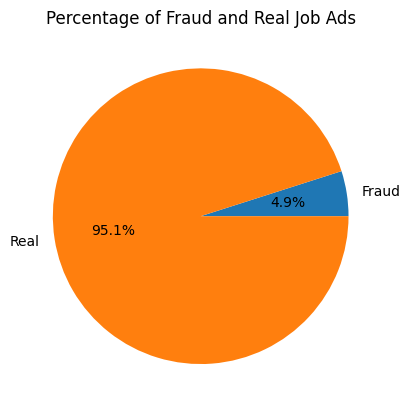

In [11]:
# Count the number of real and fraudulent job ads
fraud_count = only_fraud_ads_df.shape[0]
real_count = only_real_ads_df.shape[0]

# Create a list of counts and labels for the pie chart
counts = [fraud_count, real_count]
labels = ['Fraud', 'Real']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Real Job Ads')
plt.show()

# Job Title analysis

In [12]:
avg_title_word_count_fraud = only_fraud_ads_df['title'].apply(lambda x: len(str(x).split(" "))).mean()
avg_title_word_count_real = only_real_ads_df['title'].apply(lambda x: len(str(x).split(" "))).mean()

print("Average title word count for fraud job ads: ", round(avg_title_word_count_fraud,1))
print("Average title word count for real job ads: ", round(avg_title_word_count_real,1))

Average title word count for fraud job ads:  4.3
Average title word count for real job ads:  3.9


### Top 10 most common words in the title

In [13]:
title_string = " ".join(df['title'].astype(str)) # Concatenate titles into one long string
title_string = title_string.lower()
title_words = re.findall('\w+', title_string)# convert the text into individual words

stop_words = set(stopwords.words('english'))# Remove stop words

filtered_words = [word for word in title_words if word not in stop_words]

word_counts = Counter(filtered_words)# Count the frequency of each word

top_words = word_counts.most_common(10)# Get the most common words

for word, count in top_words:# Print the top 10 words and their frequencies
    print(word, count)

manager 1791
developer 1449
engineer 1299
sales 1083
senior 778
customer 766
service 717
english 637
teacher 624
marketing 623


### Top 10 most common words in title for fraud ads

In [14]:
titles_str = ' '.join(only_fraud_ads_df['title'].tolist())# Concatenate all titles into a single string
cleaned_str = re.sub(r'[^\w\s]', '', titles_str).lower()# Remove non-word characters and convert to lowercase
words = cleaned_str.split()# Split the cleaned string into words
word_freq = Counter(words)# Count the frequency of each word

top_words_fraud = word_freq.most_common(10)# Get the 10 most common words
top_words_fraud

[('entry', 85),
 ('data', 79),
 ('engineer', 63),
 ('assistant', 63),
 ('home', 57),
 ('manager', 56),
 ('payroll', 56),
 ('positions', 50),
 ('customer', 48),
 ('clerk', 47)]

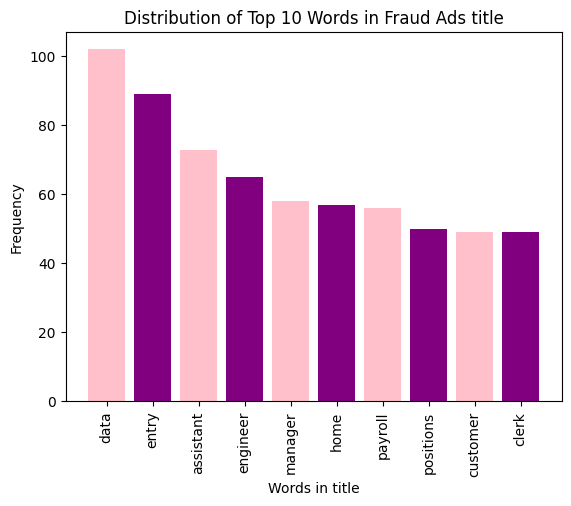

In [15]:
vectorizer = CountVectorizer(stop_words='english') 
title_matrix = vectorizer.fit_transform(only_fraud_ads_df['title'])
title_count = title_matrix.sum(axis=0)
title_freq = [(word, title_count[0, i]) for word, i in vectorizer.vocabulary_.items()]
title_freq = sorted(title_freq, key=lambda x: x[1], reverse=True)[:10]

colors = ['pink','purple']
plt.bar([x[0] for x in title_freq], [x[1] for x in title_freq] , color = colors)
plt.xticks(rotation=90)
plt.title('Distribution of Top 10 Words in Fraud Ads title')
plt.xlabel('Words in title')
plt.ylabel('Frequency')

plt.show()

### Words in fraud ads title and not in real ads title

In [16]:
fraud_df = only_fraud_ads_df
real_df = only_real_ads_df
stop_words = set(stopwords.words('english'))

def clean_text(text):# clean text from special characters and stopwords
    text = re.sub('[^a-zA-Z]+', ' ', str(text))
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

fraud_df['clean_title'] = fraud_df['title'].apply(clean_text)
real_df['clean_title'] = real_df['title'].apply(clean_text)

fraud_words = set()# set of words appears in fraud ads title
for title in fraud_df['clean_title']:
    fraud_words.update(set(title.split()))

real_words = set()# set of words appears in real ads title
for title in real_df['clean_title']:
    real_words.update(set(title.split()))

# Create a list of words that appear in the title of fraud ads but not in real ads
only_fraud_title_words = list(fraud_words - real_words)
only_fraud_title_words

C:\Users\shani\AppData\Local\Temp\ipykernel_27788\1116583334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['clean_title'] = fraud_df['title'].apply(clean_text)
C:\Users\shani\AppData\Local\Temp\ipykernel_27788\1116583334.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['clean_title'] = real_df['title'].apply(clean_text)


['paying',
 'hes',
 'advertisers',
 'nicu',
 'scams',
 'deadline',
 'francis',
 'integrity',
 'trauma',
 'rooms',
 'meridien',
 'parttime',
 'hma',
 'anesthesia',
 'preservation',
 'discipline',
 'enroll',
 'troy',
 'ermin',
 'franciscan',
 'poso',
 'sir',
 'dermatology',
 'receive',
 'offshore',
 'royale',
 'perioperative',
 'contest',
 'timers',
 'nannies',
 'daily',
 'rnfa',
 'excellence',
 'enablement',
 'clerical',
 'ninestone',
 'vacancy',
 'machining',
 'clerks',
 'info',
 'architectural',
 'mt',
 'graphite',
 'recuiter',
 'casualty',
 'legitimate',
 'begin',
 'offering',
 'waiting',
 'crews',
 'frame',
 'advertise',
 'pipeline',
 'deserve',
 'desgin',
 'girls',
 'hyatt',
 'vemma',
 'montcalm',
 'ebay',
 'urgently',
 'rhomobile',
 'wellhead',
 'transcriptionist',
 'installation',
 'endoscopy',
 'insight',
 'kl',
 'adminstrative',
 'subsea',
 'smb',
 'boys',
 'circulator',
 'guys',
 'earn',
 'approval',
 'getters',
 'sm',
 'pacu',
 'kmc',
 'vessel',
 'tele',
 'webcam',
 'peri',
 

### title length analtsis:

In [17]:
# Calculate the mean length of company profile for real ads
mean_title_length_real = only_real_ads_df['title'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_title_length_fraud = only_fraud_ads_df['title'].dropna().str.len().mean()

print('Mean title Length for Real Ads is :', round(mean_title_length_real,1))
print('Mean title Length for Fraud Ads is:', round(mean_title_length_fraud,1))

Mean title Length for Real Ads is : 28.4
Mean title Length for Fraud Ads is: 30.7


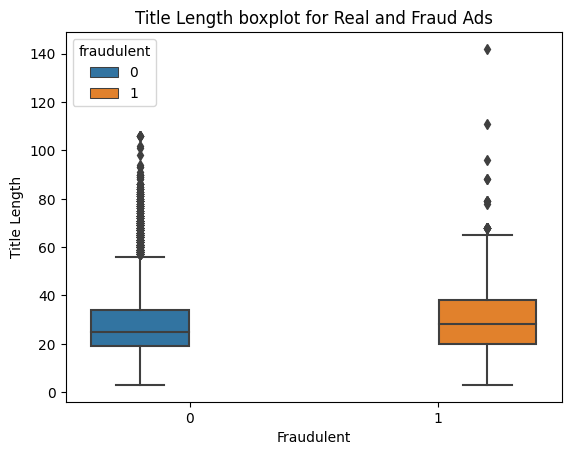

In [18]:
description_nonulls_df = df.dropna(subset=['title'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=description_nonulls_df['fraudulent'], y=description_nonulls_df['title'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Title Length')
plt.title('Title Length boxplot for Real and Fraud Ads')
plt.show()

# Location Analysis

### locations amount

In [19]:
distinct_locations = df['location'].unique()
print('Types of unique locations is {}'.format(len(distinct_locations)))
print('amount of fraud null locations: {}'.format(only_fraud_ads_df['location'].isnull().sum()))

Types of unique locations is 2749
amount of fraud null locations: 15


In [20]:
ads_per_location = df.groupby('location')['fraudulent'].value_counts().unstack().fillna(0)
ads_per_location

fraudulent,0,1
location,,
"AE, ,",4.0,1.0
"AE, , Abudhabi",1.0,0.0
"AE, , Dubai",4.0,0.0
"AE, , Media City | Dubai",2.0,0.0
"AE, AZ,",3.0,0.0
...,...,...
"ZA, NL, Pietermaritzburg",4.0,0.0
"ZA, NL, Richards Bay",7.0,0.0
"ZA, WC, Cape Town",4.0,0.0


### Top 10 frauds Locations

In [21]:
ads_per_location_summary = pd.DataFrame()
ads_per_location_summary['total_ads'] = df.groupby('location').size()# Total number of ads per location
ads_per_location_summary['real_ads'] = ads_per_location[0]# Number of real ads per location
ads_per_location_summary['frauds'] = ads_per_location[1]# Number of frauds per location
ads_per_location_summary['fraud_percentage'] = ads_per_location_summary['frauds'] / ads_per_location_summary['total_ads'] * 100# Percentage of frauds per location
ads_per_location_summary = ads_per_location_summary.nlargest(10, 'frauds')# Top 10 locations with the highest percentage of frauds
ads_per_location_summary

,total_ads,real_ads,frauds,fraud_percentage
location,,,,
"US, TX, Houston",221,145.0,76.0,34.389140
"AU, NSW, Sydney",66,41.0,25.0,37.878788
"US, ,",269,249.0,20.0,7.434944
"US, CA, Bakersfield",21,2.0,19.0,90.476190
"US, CA, Los Angeles",151,133.0,18.0,11.920530
"US, CA, San Mateo",36,19.0,17.0,47.222222
"US, NY, New York",516,499.0,17.0,3.294574
"US, TX, AUSTIN",13,0.0,13.0,100.000000
"US, CA, San Francisco",386,376.0,10.0,2.590674


# Department Analysis

In [22]:
Distinct_departmnets = df['department'].unique()
Distinct_departmnets = pd.DataFrame(Distinct_departmnets).dropna()
Distinct_departmnets

,0
1,Professional Services
2,Fixed-term & Permanent
3,Provisions by Food52
4,Content team
5,CSA REP
...,...
1148,Business Management
1149,Physical Therapy
1150,Wireless
1151,HOTEL JOBS


In [23]:
only_frauds_departments = only_fraud_ads_df['department'].unique()
only_frauds_departments = pd.DataFrame(only_frauds_departments).dropna()
only_frauds_departments

,0
1,CSA REP
2,Information Technology
3,Engineering
4,Data entry
5,Oil & Energy
...,...
86,IT
87,Call Center CSR
88,Technician
89,Sales and Marketing


# Salary range analysis

In [24]:

# calculate null percentages
null_total = df['salary_range'].isnull().sum()
null_fraud = df.loc[df['fraudulent'] == 1, 'salary_range'].isnull().sum()
null_real = df.loc[df['fraudulent'] == 0, 'salary_range'].isnull().sum()
percent_total = round(null_total / len(df) * 100, 1)
percent_fraud = round(null_fraud / len(df.loc[df['fraudulent'] == 1]) * 100, 1)
percent_real = round(null_real / len(df.loc[df['fraudulent'] == 0]) * 100, 1)

# create a table
data = {'Fraud': [null_fraud, percent_fraud],
        'Real': [null_real, percent_real],
        'Total': [null_total, percent_total]}
Null_table = pd.DataFrame(data, index=['Null values', 'Percentage'])

# print the table
Null_table

,Fraud,Real,Total
Null values,522.0,11469.0,11991.0
Percentage,74.0,84.3,83.8


In [25]:
salary_range_df = df


def categorize_salary_range(salary_range):
    if isinstance(salary_range, str):
        salary_number_value = [int(s) for s in re.split(r'[-_ ]', salary_range) if s.isdigit()]
        if len(salary_number_value) >= 2:
            salary = salary_number_value[0]
            if salary < 30000:
                return 'small'
            elif salary < 60000:
                return 'medium'
            else:
                return 'large'
        else:
            return 'unknown'
    else:
        return 'unknown'

salary_range_df['salary_category'] = salary_range_df['salary_range'].apply(categorize_salary_range)
salary_range_df['salary_category'].value_counts()

salary_category
unknown    12011
small        898
medium       780
large        615
Name: count, dtype: int64

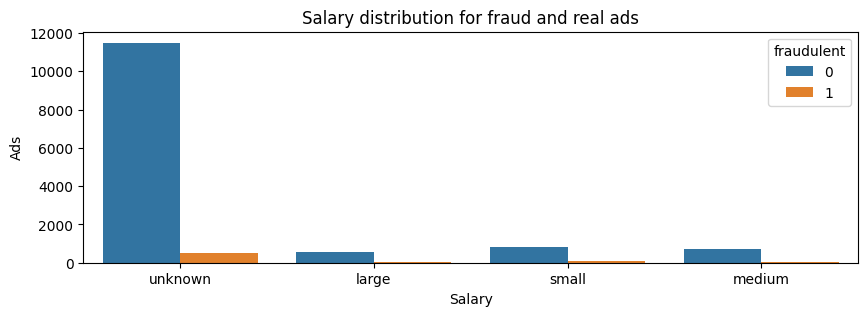

In [26]:
plt.figure(figsize=(10,3))
sns.countplot(x='salary_category', hue='fraudulent', data=salary_range_df)
plt.xlabel('Salary')
plt.ylabel('Ads')
plt.title('Salary distribution for fraud and real ads')
plt.show()

In [27]:
df.drop(['salary_category'],axis=1,inplace = True)

# Company profile analysis

In [28]:
missing_values = df['company_profile'].isnull().sum()# Check for missing values in the company_profile field
None_company_profile_prec = (missing_values / df.shape[0]) * 100
print('Missing values in company_profile field:', missing_values ,'out of 14304')
print('Missing values in company_profile field in percentage:' ,round(None_company_profile_prec,2),'%')

Missing values in company_profile field: 2684 out of 14304
Missing values in company_profile field in percentage: 18.76 %


In [29]:
# Calculate the mean length of company profile for real ads
std_company_profile_length_real = only_real_ads_df['company_profile'].str.len().std()

# Calculate the mean length of company profile for fraud ads
std_company_profile_length_fraud = only_fraud_ads_df['company_profile'].str.len().std()

print('Std Company Profile Length for Real Ads is :', round(std_company_profile_length_real,2))
print('Std Company Profile Length for Fraud Ads is:', round(std_company_profile_length_fraud,2))

Std Company Profile Length for Real Ads is : 540.29
Std Company Profile Length for Fraud Ads is: 313.46


In [30]:
# Calculate the mean length of company profile for real ads
mean_company_profile_length_real = only_real_ads_df['company_profile'].str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_company_profile_length_fraud = only_fraud_ads_df['company_profile'].str.len().mean()

print('Mean Company Profile Length for Real Ads is :', round(mean_company_profile_length_real,2))
print('Mean Company Profile Length for Fraud Ads is:', round(mean_company_profile_length_fraud,2))

Mean Company Profile Length for Real Ads is : 764.03
Mean Company Profile Length for Fraud Ads is: 717.54


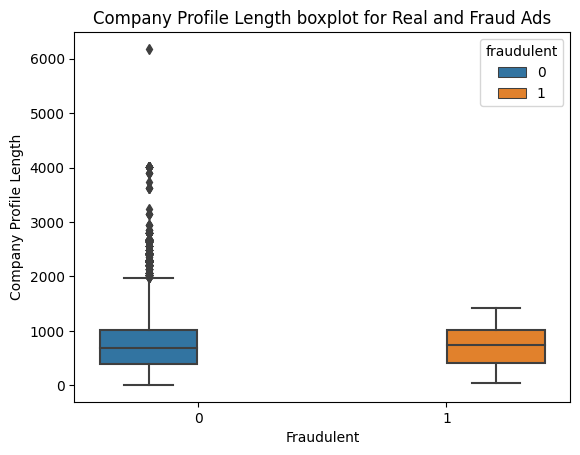

In [31]:
company_profile_nonulls_df = df.dropna(subset=['company_profile'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=company_profile_nonulls_df['fraudulent'], y=company_profile_nonulls_df['company_profile'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Company Profile Length')
plt.title('Company Profile Length boxplot for Real and Fraud Ads')
plt.show()

# Description Analysis

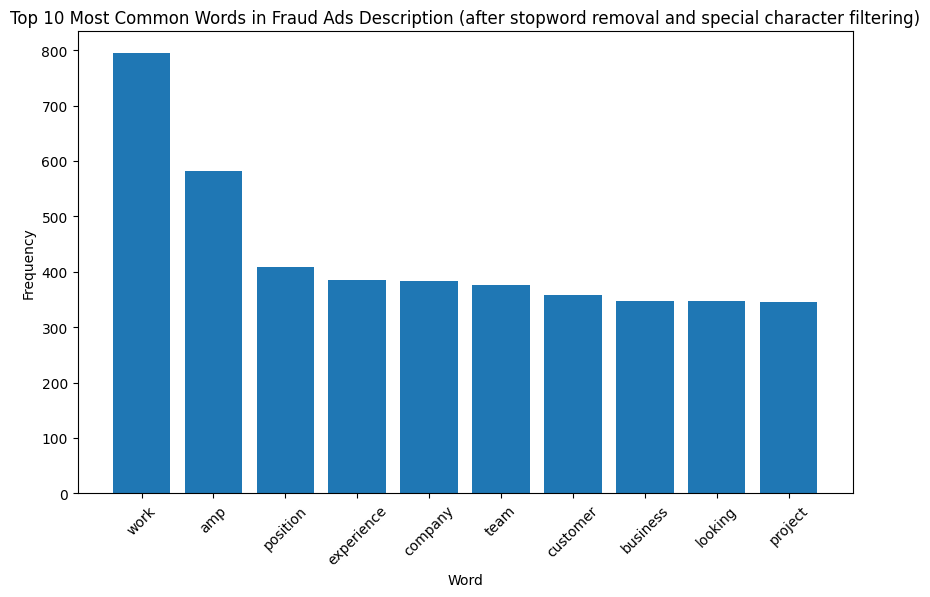

In [32]:
fraud_ads_description = " ".join(only_fraud_ads_df["description"].fillna("").values)# Concatenate all the descriptions into a single string
words = word_tokenize(fraud_ads_description)# Tokenize the description string into individual words
stop_words = set(stopwords.words("english"))# Remove stopwords
words = [word.lower() for word in words if word.lower() not in stop_words]
words = [word for word in words if re.match(r'^[a-zA-Z0-9]+$', word)]# Remove words containing special characters
word_counts = Counter(words)# Count the occurrences of each word
top_10_words = word_counts.most_common(10)# Get the top 10 most common words
top_words = [word for word, count in top_10_words]# Extract the words and their counts into separate lists
word_counts = [count for word, count in top_10_words]

plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Fraud Ads Description (after stopword removal and special character filtering)")
plt.xticks(rotation=45)
plt.show()

In [33]:
# Calculate the mean length of company profile for real ads
std_description_length_real = only_real_ads_df['description'].str.len().std()

# Calculate the mean length of company profile for fraud ads
std_description_length_fraud = only_fraud_ads_df['description'].str.len().std()

print('Std description Length for Real Ads is :', round(std_description_length_real,2))
print('Std description Length for Fraud Ads is:', round(std_description_length_fraud,2))

Std description Length for Real Ads is : 896.97
Std description Length for Fraud Ads is: 1013.05


In [34]:

# Calculate the mean length of company profile for real ads
mean_description_length_real = only_real_ads_df['description'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_description_length_fraud = only_fraud_ads_df['description'].dropna().str.len().mean()

print('Mean description Length for Real Ads is :', round(mean_description_length_real,2))
print('Mean description Length for Fraud Ads is:', round(mean_description_length_fraud,2))

Mean description Length for Real Ads is : 1225.53
Mean description Length for Fraud Ads is: 1160.57


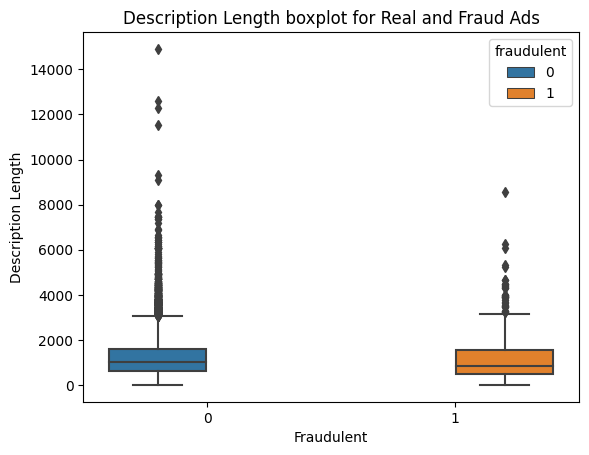

In [35]:
description_nonulls_df = df.dropna(subset=['description'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=description_nonulls_df['fraudulent'], y=description_nonulls_df['description'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Description Length')
plt.title('Description Length boxplot for Real and Fraud Ads')
plt.show()

# Requirements analysis

In [36]:
# Calculate the mean length of company profile for real ads
mean_requirements_length_real = only_real_ads_df['requirements'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_requirements_length_fraud = only_fraud_ads_df['requirements'].dropna().str.len().mean()

print('Mean requirements Length for Real Ads is :', round(mean_requirements_length_real,2))
print('Mean requirements Length for Fraud Ads is:', round(mean_requirements_length_fraud,2))

Mean requirements Length for Real Ads is : 697.89
Mean requirements Length for Fraud Ads is: 543.9


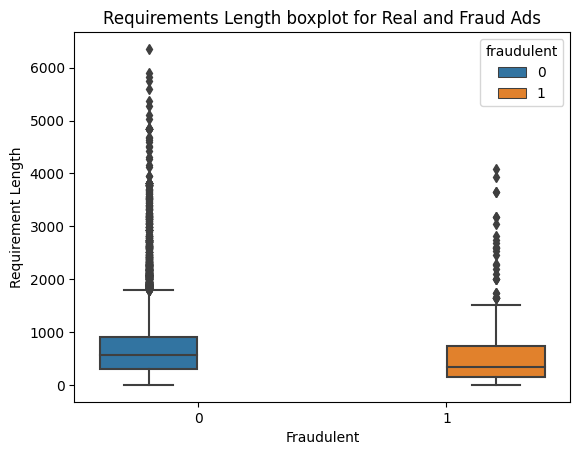

In [37]:
requirements_nonulls_df = df.dropna(subset=['requirements'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=requirements_nonulls_df['fraudulent'], y=requirements_nonulls_df['requirements'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Requirement Length')
plt.title('Requirements Length boxplot for Real and Fraud Ads')
plt.show()

In [38]:
all_data = df # all the data
fraudulent_ads = only_fraud_ads_df # Filter for real ads
not_fraudulent_ads = only_real_ads_df# Filter for fraud ads

In [39]:
all_data['requirements_len'] = all_data['requirements'].str.len() # describe of all the data
print(all_data['requirements_len'].describe())

count    12122.000000
mean       690.513942
std        600.830642
min          1.000000
25%        298.000000
50%        559.000000
75%        899.000000
max       6356.000000
Name: requirements_len, dtype: float64


In [40]:
not_fraudulent_ads['requirements_len'] = not_fraudulent_ads['requirements'].str.len() # describe of real ads only
print(not_fraudulent_ads['requirements_len'].describe())

count    11541.000000
mean       697.894983
std        600.205710
min          1.000000
25%        311.000000
50%        564.000000
75%        904.000000
max       6356.000000
Name: requirements_len, dtype: float64


C:\Users\shani\AppData\Local\Temp\ipykernel_27788\1551550169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_fraudulent_ads['requirements_len'] = not_fraudulent_ads['requirements'].str.len() # describe of real ads only


In [41]:
fraudulent_ads['requirements_len'] = fraudulent_ads['requirements'].str.len() # describe of fraud ads only
print(fraudulent_ads['requirements_len'].describe())

count     581.000000
mean      543.896730
std       594.925057
min         6.000000
25%       149.000000
50%       348.000000
75%       734.000000
max      4077.000000
Name: requirements_len, dtype: float64


C:\Users\shani\AppData\Local\Temp\ipykernel_27788\173968240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_ads['requirements_len'] = fraudulent_ads['requirements'].str.len() # describe of fraud ads only


### top 10 most common words on fraud ads requirements

In [42]:
text = " ".join(fraudulent_ads['requirements'].astype(str))# Concatenate all the requirements into one long string
text = text.lower()# Convert all text to lowercase
words = re.findall('\w+', text)# Tokenize the text into individual words
stop_words = set(stopwords.words('english'))# Remove stop words
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)# Count the frequency of each word
top_words_fruad = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]# Sort the words by frequency in descending order
for word, count in top_words_fruad:# Print the top 10 words and their frequencies
    print(word, count)

experience 767
skills 514
work 374
ability 349
years 253
must 241
amp 238
knowledge 228
required 221
computer 180


In [43]:
df.drop('requirements_len',axis=1, inplace = True)

# Benefits Analysis

### Top 10 most common words in benefits for fraud ads

In [44]:
text = " ".join(only_fraud_ads_df['benefits'].astype(str))# Concatenate all the benefits into one long string
text = text.lower()# Convert all text to lowercase
words = re.findall('\w+', text)# Tokenize the text into individual words
stop_words = set(stopwords.words('english'))# Remove stop words
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)# Count the frequency of each word
top_words_fruad = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]# Sort the words by frequency in descending order
for word, count in top_words_fruad:# Print the top 10 words and their frequencies
    print(word, count)

nan 291
benefits 245
company 178
work 172
training 129
paid 129
time 128
environment 114
competitive 111
get 111


### Top 10 most common words in benefits for real ads

In [45]:
text = " ".join(only_real_ads_df['benefits'].astype(str))# Concatenate all the benefits into one long string
text = text.lower()# Convert all text to lowercase
words = re.findall('\w+', text)# Tokenize the text into individual words
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)# Count the frequency of each word
top_words_fruad = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]# Sort the words by frequency in descending order
for word, count in top_words_fruad:# Print the top 10 words and their frequencies
    print(word, count)

nan 5455
work 3442
benefits 2846
company 2637
competitive 2296
team 2114
salary 1931
time 1870
paid 1846
amp 1602


In [46]:
# Calculate the mean length of company profile for real ads
std_benefits_length_real = only_real_ads_df['benefits'].dropna().str.len().std()

# Calculate the mean length of company profile for fraud ads
std_benefits_length_fraud = only_fraud_ads_df['benefits'].dropna().str.len().std()

print('Std benefits Length for Real Ads is :', round(std_benefits_length_real,2))
print('Std benefits Length for Fraud Ads is:', round(std_benefits_length_fraud,2))

Std benefits Length for Real Ads is : 372.3
Std benefits Length for Fraud Ads is: 422.05


In [47]:
# Calculate the mean length of company profile for real ads
mean_benefits_length_real = only_real_ads_df['benefits'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_benefits_length_fraud = only_fraud_ads_df['benefits'].dropna().str.len().mean()

print('Mean benefits Length for Real Ads is :', round(mean_benefits_length_real,2))
print('Mean benefits Length for Fraud Ads is:', round(mean_benefits_length_fraud,2))

Mean benefits Length for Real Ads is : 348.12
Mean benefits Length for Fraud Ads is: 372.02


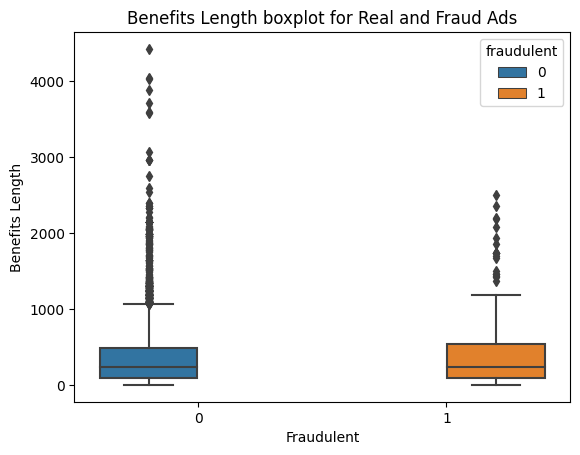

In [48]:
benefits_nonulls_df = df.dropna(subset=['benefits'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=benefits_nonulls_df['fraudulent'], y=benefits_nonulls_df['benefits'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Benefits Length')
plt.title('Benefits Length boxplot for Real and Fraud Ads')
plt.show()

# Telecommuting analysis

In [49]:
# percentage of telecommuting positions in all the data
overall_telecommuting_pct = (df['telecommuting'].sum() / df.shape[0]) * 100
print(f"Percentage of telecommuting positions in all of the data: {overall_telecommuting_pct:.2f}%")

# percentage of telecommuting positions for real job postings
real_telecommuting_pct = (only_real_ads_df['telecommuting'].sum() / only_real_ads_df.shape[0]) * 100
print(f"Percentage of telecommuting positions in real ads: {real_telecommuting_pct:.2f}%")

# percentage of telecommuting positions for fraudulent job postings
fraud_telecommuting_pct = (only_fraud_ads_df['telecommuting'].sum() / only_fraud_ads_df.shape[0]) * 100
print(f"Percentage of telecommuting positions in fraud ads: {fraud_telecommuting_pct:.2f}%")

Percentage of telecommuting positions in all of the data: 4.28%
Percentage of telecommuting positions in real ads: 4.11%
Percentage of telecommuting positions in fraud ads: 7.52%


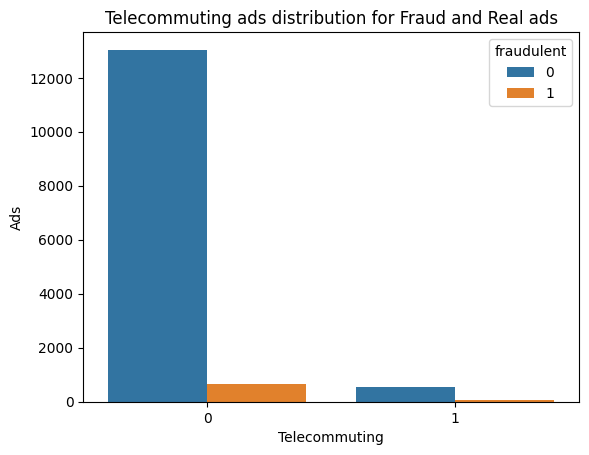

In [50]:
sns.countplot(x='telecommuting', hue='fraudulent', data=df )
plt.xlabel('Telecommuting')
plt.ylabel('Ads')
plt.title('Telecommuting ads distribution for Fraud and Real ads')
plt.show()


# Has Company Logo Analysis

In [51]:
# percentage of Has Company Logo positions in the overall dataset
overall_has_company_logo_pct = (df['has_company_logo'].sum() / df.shape[0]) * 100
print(f"Percentage of has_company_logo positions in all of the data: {overall_has_company_logo_pct:.2f}%")

# percentage of Has Company Logo positions for real ads 
real_has_company_logo_pct = (only_real_ads_df['has_company_logo'].sum() / only_real_ads_df.shape[0]) * 100
print(f"Percentage of has_company_logo positions in real ads: {real_has_company_logo_pct:.2f}%")

# percentage of Has Company Logo positions for fraud ads 
fraud_has_company_logo_pct = (only_fraud_ads_df['has_company_logo'].sum() / only_fraud_ads_df.shape[0]) * 100
print(f"Percentage of has_company_logo positions in fraud ads: {fraud_has_company_logo_pct:.2f}%")

Percentage of has_company_logo positions in all of the data: 79.35%
Percentage of has_company_logo positions in real ads: 81.80%
Percentage of has_company_logo positions in fraud ads: 32.06%


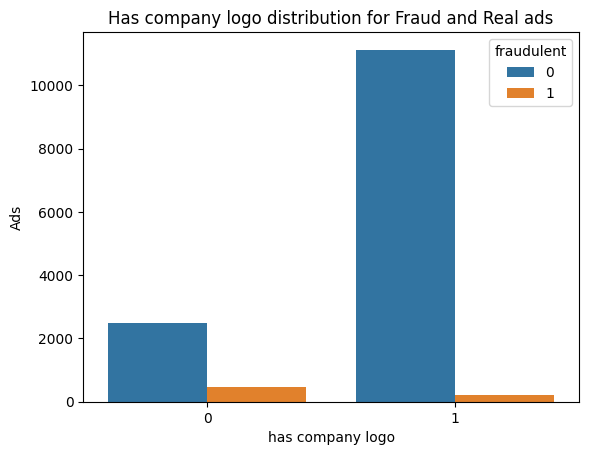

In [52]:
sns.countplot(x='has_company_logo', hue='fraudulent', data=df )
plt.xlabel('has company logo')
plt.ylabel('Ads')
plt.title('Has company logo distribution for Fraud and Real ads')
plt.show()

# Has questions analysis

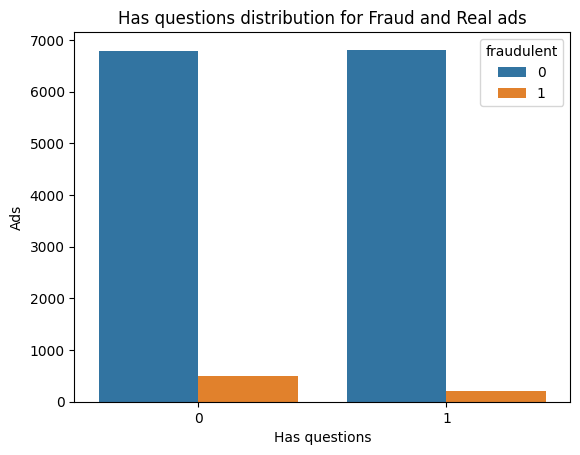

In [53]:
sns.countplot(x='has_questions', hue='fraudulent', data=df )
plt.xlabel('Has questions')
plt.ylabel('Ads')
plt.title('Has questions distribution for Fraud and Real ads')
plt.show()

# Employment type analysis

### Distribution of Employment Types for fraud and real ads

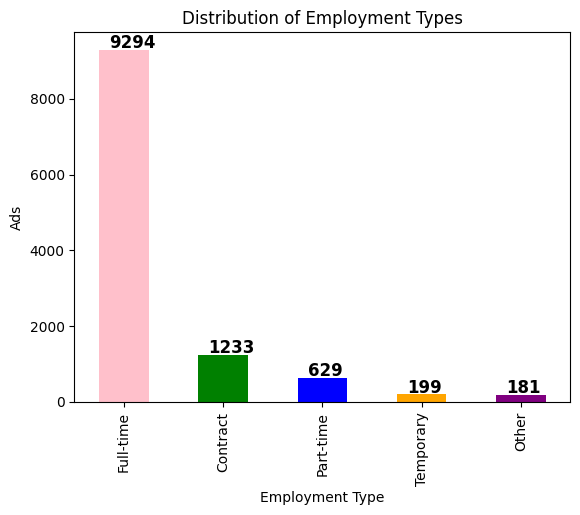

In [54]:
colors = ['pink', 'green', 'blue', 'orange', 'purple', 'gray']
ax = df['employment_type'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Ads')
for i, v in enumerate(df['employment_type'].value_counts()):
    ax.text(i - 0.15, v + 50, str(v), color='black', fontweight='bold', fontsize=12)


### Fraud and real ads for each employment type

Text(0, 0.5, 'Ads')

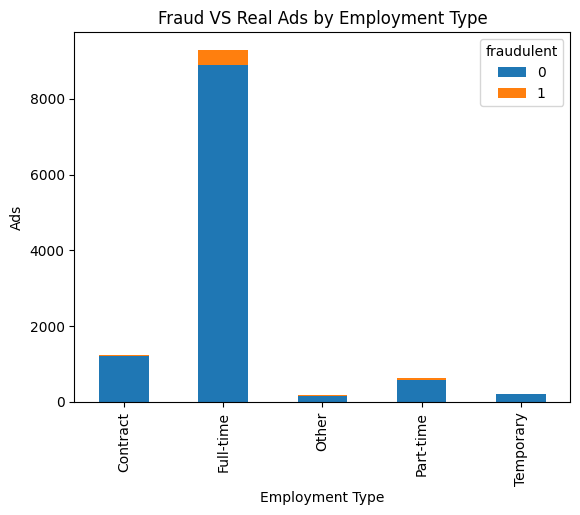

In [55]:
pd.crosstab(df['employment_type'], df['fraudulent']).plot(kind='bar', stacked=True)
plt.title('Fraud VS Real Ads by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Ads')

### The distribution of required experience for each employment type in the dataset

Text(0, 0.5, 'Ads')

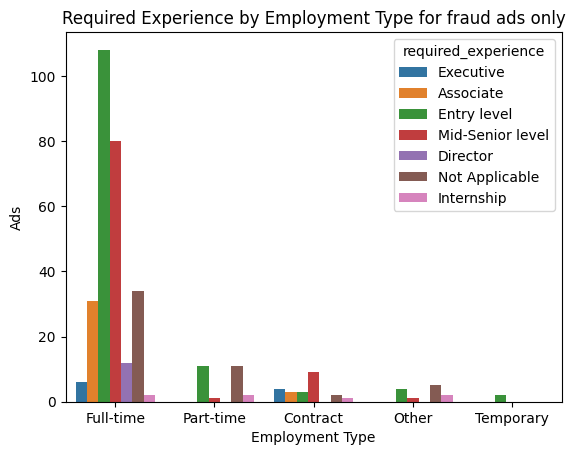

In [56]:
sns.countplot(x='employment_type', hue='required_experience', data=only_fraud_ads_df)
plt.title('Required Experience by Employment Type for fraud ads only')
plt.xlabel('Employment Type')
plt.ylabel('Ads')

# Requiered expirements analysis

In [57]:
print(df['required_experience'].isnull().sum())

5622


In [58]:
df['required_experience'].value_counts()

required_experience
Mid-Senior level    3064
Entry level         2151
Associate           1825
Not Applicable       899
Director             311
Internship           309
Executive            123
Name: count, dtype: int64

In [59]:
pd.crosstab(df['required_experience'], df['fraudulent'], normalize='index')

fraudulent,0,1
required_experience,,
Associate,0.981370,0.018630
Director,0.961415,0.038585
Entry level,0.932125,0.067875
Executive,0.918699,0.081301
Internship,0.977346,0.022654
Mid-Senior level,0.970300,0.029700
Not Applicable,0.942158,0.057842


### Required experience distribution for fraud and real ads

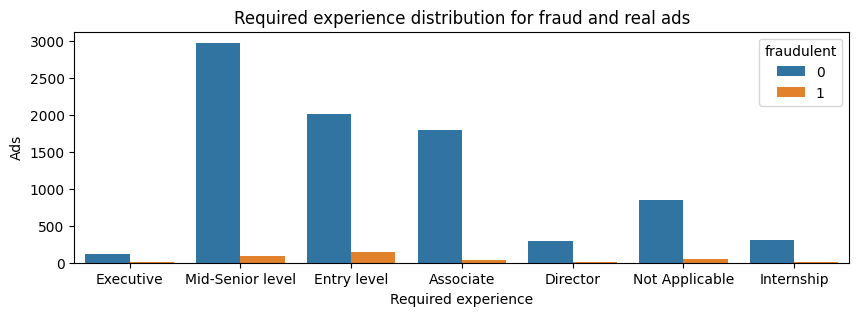

In [60]:
plt.figure(figsize=(10,3))
sns.countplot(x='required_experience', hue='fraudulent', data=df)
plt.xlabel('Required experience')
plt.ylabel('Ads')
plt.title('Required experience distribution for fraud and real ads')
plt.show()

# required_education

In [61]:
print(df['required_education'].isnull().sum())

6490


In [62]:
df['required_education'].value_counts()

required_education
Bachelor's Degree                    4127
High School or equivalent            1651
Unspecified                          1113
Master's Degree                       323
Associate Degree                      219
Certification                         141
Some College Coursework Completed      89
Professional                           63
Vocational                             39
Some High School Coursework            22
Doctorate                              16
Vocational - HS Diploma                 6
Vocational - Degree                     5
Name: count, dtype: int64

### Frequency Distribution of Required Education in fraud ads

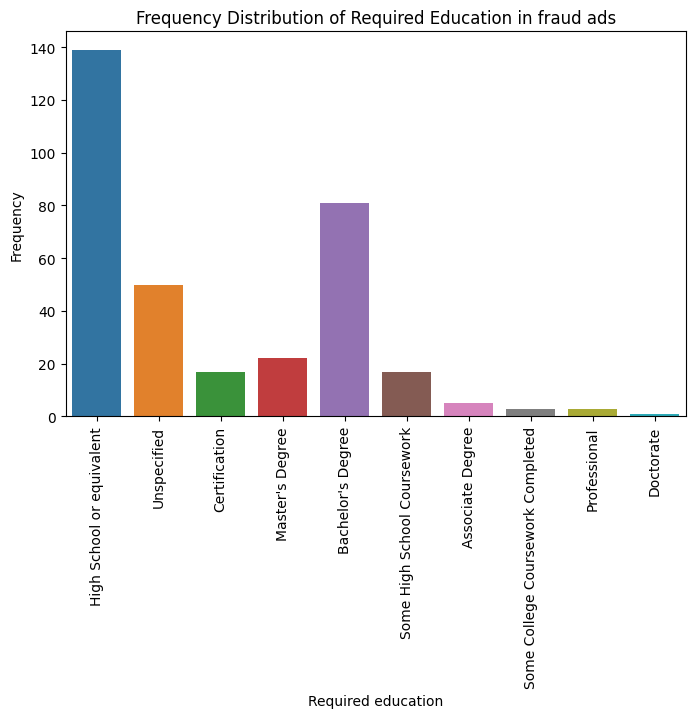

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x='required_education', data=only_fraud_ads_df)
plt.xticks(rotation=90)
plt.xlabel('Required education')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Required Education in fraud ads')
plt.show()

In [64]:
pd.crosstab(df['required_education'], df['fraudulent'], normalize='index')

fraudulent,0,1
required_education,,
Associate Degree,0.977169,0.022831
Bachelor's Degree,0.980373,0.019627
Certification,0.879433,0.120567
Doctorate,0.937500,0.062500
High School or equivalent,0.915809,0.084191
Master's Degree,0.931889,0.068111
Professional,0.952381,0.047619
Some College Coursework Completed,0.966292,0.033708
Some High School Coursework,0.227273,0.772727


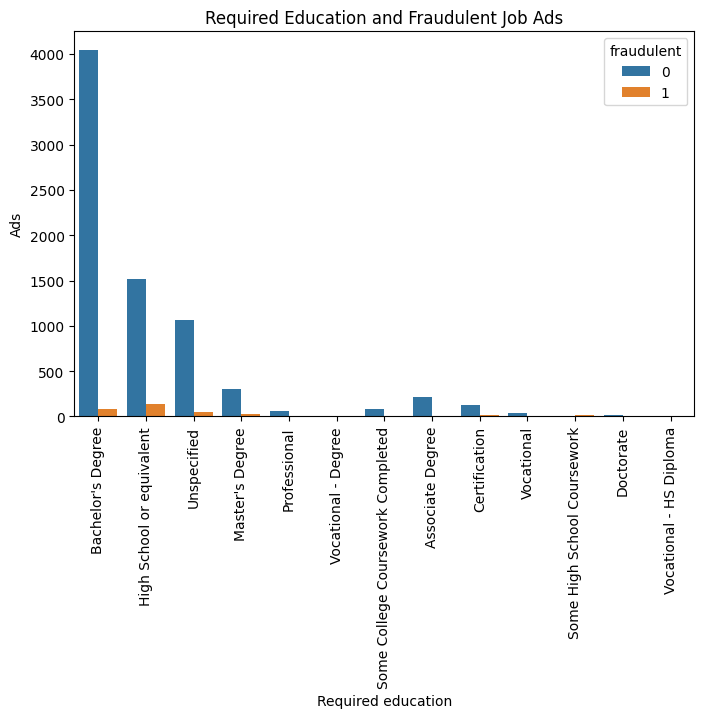

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x='required_education', hue='fraudulent', data=df)
plt.xlabel('Required education')
plt.ylabel('Ads')
plt.title('Required Education and Fraudulent Job Ads')
plt.xticks(rotation=90)
plt.show()

# Industry analysis

In [66]:
print(df['industry'].isnull().sum())

3929


In [67]:
df['industry'].value_counts().nlargest(10)

industry
Information Technology and Services    1377
Computer Software                      1118
Internet                                844
Education Management                    663
Marketing and Advertising               643
Financial Services                      619
Hospital & Health Care                  396
Consumer Services                       290
Telecommunications                      265
Oil & Energy                            240
Name: count, dtype: int64

# Function analysis

In [68]:
len(df['function'].unique())

38

In [69]:
df['function'].value_counts().nlargest(10)

function
Information Technology    1410
Sales                     1199
Engineering               1066
Customer Service           974
Marketing                  662
Administrative             493
Health Care Provider       270
Design                     263
Other                      260
Education                  258
Name: count, dtype: int64

In [70]:
pd.crosstab(df['function'], df['fraudulent'], normalize='index')

fraudulent,0,1
function,,
Accounting/Auditing,0.872093,0.127907
Administrative,0.797160,0.202840
Advertising,0.945205,0.054795
Art/Creative,0.989899,0.010101
Business Analyst,0.984848,0.015152
Business Development,0.951613,0.048387
Consulting,0.965217,0.034783
Customer Service,0.944559,0.055441
Data Analyst,0.942029,0.057971


### functions only in fraud and never in real ads

In [71]:
fraud_func_not_real = set(only_fraud_ads_df['function']) - set(only_real_ads_df['function'])
print(fraud_func_not_real)
print('Nan of the functions appears only in fraud ads and never in real ads')

set()
Nan of the functions appears only in fraud ads and never in real ads


### functions only in real and never in fraud ads

In [72]:
real_func_not_fraud = set(only_real_ads_df['function']) - set(only_fraud_ads_df['function'])
print(real_func_not_fraud)
print('functions appears only in real ads and never in fraud ads')

{'Product Management', 'Supply Chain', 'Legal', 'Quality Assurance', 'Purchasing', 'Science', 'Research', 'Production', 'Training', 'Writing/Editing'}
functions appears only in real ads and never in fraud ads


# Connection between 2 textual veriables analysis

### words from function appears in title 

In [73]:
# apply the function to each row of the DataFrame
df_no_null['title_matches_function'] = df_no_null.apply(lambda row: check_keywords(row['title'], row['function'].lower().split('/')), axis=1)

fraud_ads_function_in_title = df_no_null[(df_no_null['title_matches_function']) & (df_no_null['fraudulent'] == 1)]
real_ads_function_in_title = df_no_null[(df_no_null['title_matches_function']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where words from function appears in the title: {} in percentage out of all fraud ads: {}'.format(fraud_ads_function_in_title.shape[0],(fraud_ads_function_in_title.shape[0]/len(only_fraud_ads_df))*100))
print('Reald ads where words from function appears in the title: {} in percentage out of all real ads: {}'.format(real_ads_function_in_title.shape[0],(real_ads_function_in_title.shape[0]/len(only_real_ads_df))*100))

Fraud ads where words from function appears in the title: 273 in percentage out of all fraud ads: 38.72340425531915
Reald ads where words from function appears in the title: 4868 in percentage out of all real ads: 35.79674976101184


### Words from required_experience appears in description 

In [74]:
# create a function that checks if any of the words in a string appear in a list of keywords
def check_keywords_for_required_experience(string, keywords):
    separators = r'[ \/*_.:;!,&]+'  # regular expression that matches separators
    for word in re.split(separators, string):
        if word.lower() in keywords:
            return True
    return False

# apply the function to each row of the DataFrame
df_no_null = df_no_null[df_no_null['required_experience'] != 'Not Applicable']
df_no_null['description_matches_requiredExperience'] = df_no_null.apply(lambda row: 
    check_keywords_for_required_experience(row['description'], re.split(r'[ /&]+', row['required_experience'].lower())) 
    if row['required_experience'] else False, axis=1)

fraud_ads_description_matches_requiredExperience = df_no_null[(df_no_null['description_matches_requiredExperience']) & (df_no_null['fraudulent'] == 1)]
real_ads_description_matches_requiredExperience = df_no_null[(df_no_null['description_matches_requiredExperience']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where required_experience appears in the description: {} in percentage out of all fraud ads: {}'.format(fraud_ads_description_matches_requiredExperience.shape[0],(fraud_ads_description_matches_requiredExperience.shape[0]/len(only_fraud_ads_df))*100))
print('Reald ads where required_experience appears in the description: {} in percentage out of all real ads: {}'.format(real_ads_description_matches_requiredExperience.shape[0],(real_ads_description_matches_requiredExperience.shape[0]/len(only_real_ads_df))*100))

Fraud ads where required_experience appears in the description: 75 in percentage out of all fraud ads: 10.638297872340425
Reald ads where required_experience appears in the description: 993 in percentage out of all real ads: 7.302007500551511


### Words from industry appears in description

In [75]:
# apply the function to each row of the DataFrame
df_no_null['description_matches_industry'] = df_no_null.apply(lambda row: 
    check_keywords(row['description'], re.split(r'[ /*-_.:;!,&]+', row['industry'].lower())) 
    if row['industry'] else False, axis=1)

fraud_ads_description_matches_industry = df_no_null[(df_no_null['description_matches_industry']) & (df_no_null['fraudulent'] == 1)]
real_ads_description_matches_industry = df_no_null[(df_no_null['description_matches_industry']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where industry appears in the description: {} in percentage out of all fraud ads: {}'.format(fraud_ads_description_matches_industry.shape[0],(fraud_ads_description_matches_industry.shape[0]/len(only_fraud_ads_df))*100))
print('Real ads where industry appears in the description: {} in percentage out of all real ads: {}'.format(real_ads_description_matches_industry.shape[0],(real_ads_description_matches_industry.shape[0]/len(only_real_ads_df))*100))

Fraud ads where industry appears in the description: 181 in percentage out of all fraud ads: 25.673758865248224
Real ads where industry appears in the description: 4281 in percentage out of all real ads: 31.4802559011692


### Words from department appears in description

In [76]:
# apply the function to each row of the DataFrame
df_no_null['description_matches_department'] = df_no_null.apply(lambda row: 
    check_keywords(row['description'], re.split(r'[ /*-_.:;!,&]+', row['department'].lower())) 
    if row['department'] else False, axis=1)

fraud_ads_description_matches_department = df_no_null[(df_no_null['description_matches_department']) & (df_no_null['fraudulent'] == 1)]
real_ads_description_matches_department = df_no_null[(df_no_null['description_matches_department']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where department appears in the description: {} in percentage out of all fraud ads: {}'.format(fraud_ads_description_matches_department.shape[0],(fraud_ads_description_matches_department.shape[0]/len(only_fraud_ads_df))*100))
print('Real ads where department appears in the description: {} in percentage out of all real ads: {}'.format(real_ads_description_matches_department.shape[0],(real_ads_description_matches_department.shape[0]/len(only_real_ads_df))*100))

Fraud ads where department appears in the description: 123 in percentage out of all fraud ads: 17.4468085106383
Real ads where department appears in the description: 2284 in percentage out of all real ads: 16.795352599455843


# PART B

# 1. Pre-processing

## Remove Duplicates:

In [77]:
cols_to_check = ['title', 'location', 'company_profile', 'description', 'requirements', 'employment_type', 'industry', 'function']
duplicates = df[df.duplicated(subset=cols_to_check, keep=False)] #check duplicates
print(f"Number of duplicate rows found: {len(duplicates)}")
df.drop_duplicates(subset=cols_to_check, inplace=True)

Number of duplicate rows found: 407


## Missing values:

In [78]:
df['location'].fillna('Unknown', inplace=True)
df['company_profile'].fillna('', inplace=True)
df['description'].fillna('', inplace=True)
df['requirements'].fillna('', inplace=True)
df['benefits'].fillna('', inplace=True)
df['salary_range'].fillna('', inplace=True)
df['employment_type'].fillna('Unknown', inplace=True)
df['department'].fillna('Unknown', inplace=True)
df['required_experience'].fillna('Unknown', inplace=True)
df['required_education'].fillna('Unknown', inplace=True)
df['industry'].fillna('Unknown', inplace=True)
df['function'].fillna('Unknown', inplace=True)

## Data type conversions:

### Location

In [79]:
# Define a function to extract the category from a location value
def extract_category(location):
    return location.split(',')[0].strip()

# Apply the mapping to the 'location' column
df['location'] = df['location'].apply(extract_category)

In [80]:
# Define the mapping
category_mapping = {
    'NZ': 'APAC',
    'US': 'Americas',
    'MY': 'APAC',
    'GB': 'EMEA',
    'CA': 'Americas',
    'GR': 'EMEA',
    'ES': 'EMEA',
    'BH': 'EMEA',
    'VN': 'APAC',
    'IN': 'APAC',
    'DE': 'EMEA',
    'NL': 'EMEA',
    'PH': 'APAC',
    'AU': 'APAC',
    'HK': 'APAC',
    'KH': 'APAC',
    'SI': 'EMEA',
    'EE': 'EMEA',
    'Unknown': 'Unknown',
    'RS': 'EMEA',
    'EG': 'EMEA',
    'BR': 'Americas',
    'PL': 'EMEA',
    'ZA': 'Africa',
    'IL': 'EMEA',
    'FR': 'EMEA',
    'BE': 'EMEA',
    'IE': 'EMEA',
    'MT': 'EMEA',
    'MU': 'EMEA',
    'IQ': 'EMEA',
    'TR': 'EMEA',
    'CY': 'EMEA',
    'IT': 'EMEA',
    'AE': 'EMEA',
    'DK': 'EMEA',
    'RO': 'EMEA',
    'SG': 'APAC',
    'FI': 'EMEA',
    'CH': 'EMEA',
    'SE': 'EMEA',
    'PK': 'APAC',
    'BY': 'EMEA',
    'KE': 'Africa',
    'AR': 'Americas',
    'TT': 'Americas',
    'NO': 'EMEA',
    'PT': 'EMEA',
    'GH': 'Africa',
    'LT': 'EMEA',
    'PA': 'Americas',
    'LV': 'EMEA',
    'PE': 'Americas',
    'JP': 'APAC',
    'KR': 'APAC',
    'KW': 'EMEA',
    'ZM': 'Africa',
    'BD': 'APAC',
    'SA': 'EMEA',
    'RU': 'EMEA',
    'VI': 'Unknown',
    'MX': 'Americas',
    'BG': 'EMEA',
    'CZ': 'EMEA',
    'NG': 'Africa',
    'CO': 'Americas',
    'NI': 'Americas',
    'AT': 'EMEA',
    'LU': 'EMEA',
    'ID': 'APAC',
    'HU': 'EMEA',
    'TH': 'APAC',
    'UG': 'Africa',
    'CN': 'APAC',
    'QA': 'EMEA',
    'CM': 'Africa',
    'LK': 'APAC',
    'UA': 'EMEA',
    'SK': 'EMEA',
    'CL': 'Americas',
    'SV': 'Americas',
    'AM': 'EMEA',
    'TW': 'APAC',
    'TN': 'EMEA',
    'KZ': 'EMEA',
    'IS': 'EMEA',
    'AL': 'EMEA'
}

# Apply the mapping to the 'category' column
df['location'] = df['location'].map(category_mapping)

# Count the number of categories and regions
df['location'].unique()    # number of regions

array(['APAC', 'Americas', 'EMEA', 'Unknown', 'Africa'], dtype=object)

In [81]:
dummies_location = pd.get_dummies(df['location'], prefix='location', dtype =int)
df = pd.concat([df, dummies_location],axis=1)

### Employment type:

In [82]:
dummies_employment_type = pd.get_dummies(df['employment_type'], prefix='employment_type',dtype =int)
df = pd.concat([df, dummies_employment_type], axis=1)

### Required experience:

In [83]:
dummies_required_experience = pd.get_dummies(df['required_experience'], prefix='required_experience',dtype =int)
df = pd.concat([df, dummies_required_experience], axis=1)

### Required education:

In [84]:
required_education_mapping = {'Phd': 'Higher Education',
               "Master's Degree": 'Higher Education',
               "Bachelor's Degree": 'Higher Education',
                'Doctorate': 'Higher Education',
               'Associate Degree': 'Associate Education',
               'High School or equivalent': 'High School Education',
                'Some High School Coursework':'High School Education',
               'Some College Coursework Completed': 'College Education',
               'Professional': 'Professional Education',
               'Vocational': 'Professional Education',
               'Vocational - HS Diploma': 'Professional Education',
               'Vocational - Degree': 'Professional Education',
                'Unspecified': 'Unknown',
                'Unknown': 'Unknown',
                'Certification': 'Certification Education'}

# Replace values in the 'required_education' column
df['required_education'] = df['required_education'].replace(required_education_mapping)


In [85]:
dummies_required_education = pd.get_dummies(df['required_education'], prefix='required_education',dtype =int)
df = pd.concat([df, dummies_required_education], axis=1)

### Industry

In [86]:
industry_mapping = {'Unknown': 'Unknown',
                    'Hospitality': 'Other Services',
                    'Online Media': 'Internet',
                    'Medical Practice': 'Healthcare',
                    'Internet': 'Internet',
                    'Financial Services': 'Finance',
                    'Pharmaceuticals': 'Healthcare',
                    'Real Estate': 'Real Estate',
                    'Oil & Energy': 'Energy',
                    'Marketing and Advertising': 'Marketing',
                    'Food Production': 'Food',
                    'Computer Software': 'Technology',
                    'Building Materials': 'Construction',
                    'Telecommunications': 'Telecom',
                    'Nonprofit Organization Management': 'Nonprofit',
                    'Hospital & Health Care': 'Healthcare',
                    'Logistics and Supply Chain': 'Logistics',
                    'Cosmetics': 'Beauty',
                    'Construction': 'Construction',
                    'Retail': 'Retail',
                    'Warehousing': 'Logistics',
                    'Security and Investigations': 'Security',
                    'Management Consulting': 'Consulting',
                    'Civic & Social Organization': 'Nonprofit',
                    'Consumer Services': 'Other Services',
                    'Information Technology and Services': 'Technology',
                    'Government Administration': 'Government',
                    'Staffing and Recruiting': 'HR',
                    'Fund-Raising': 'Nonprofit',
                    'Leisure, Travel & Tourism': 'Travel',
                    'Media Production': 'Media',
                    'Health, Wellness and Fitness': 'Healthcare',
                    'Insurance': 'Insurance',
                    'E-Learning': 'Education',
                    'Publishing': 'Media',
                    'Education Management': 'Education',
                    'Graphic Design': 'Design',
                    'Events Services': 'Events',
                    'Computer Games': 'Gaming',
                    'Legal Services': 'Legal',
                    'Wholesale': 'Retail',
                    'Banking': 'Finance',
                    'Venture Capital & Private Equity': 'Finance',
                    'Electrical/Electronic Manufacturing': 'Manufacturing',
                    'Utilities': 'Energy',
                    'Mechanical or Industrial Engineering': 'Engineering',
                    'Machinery': 'Manufacturing',
                    'Consumer Electronics': 'Technology',
                    'Consumer Goods': 'Retail',
                    'Transportation/Trucking/Railroad': 'Transportation',
                    'Human Resources': 'HR',
                    'Restaurants': 'Food',
                    'Business Supplies and Equipment': 'Business',
                    'Airlines/Aviation': 'Transportation',
                    'Defense & Space': 'Government',
                    'Food & Beverages': 'Food',
                    'Research': 'Research',
                    'Market Research': 'Research',
                    'Mental Health Care': 'Healthcare',
                    'Design': 'Design',
                    'Apparel & Fashion': 'Fashion',
                    'Automotive': 'Automotive',
                    'Biotechnology': 'Biotech',
                    'Computer Networking': 'Technology',
                    'Executive Office': 'Business',
                    'Photography': 'Media',
                    'Aviation & Aerospace': 'Transportation',
                    'Chemicals': 'Manufacturing',
                    'Computer & Network Security': 'Technology',
                    'Law Practice': 'Legal',
                    'Computer Hardware': 'Technology',
                    'Gambling & Casinos': 'Gaming',
                    'Architecture & Planning': 'Architecture',
                    'Printing': 'Printing',
                    'Primary/Secondary Education': 'Education',
                    'Accounting': 'Finance',
                    'Renewables & Environment': 'Environment',
                    'Outsourcing/Offshoring': 'Business',
                    'Facilities Services': 'Business',
                    'Professional Training & Coaching': 'Education',
                    'Medical Devices': 'Healthcare',
                    'Government Relations': 'Government'}

df['industry'] = df['industry'].map(industry_mapping)

In [87]:
dummies_industry = pd.get_dummies(df['industry'], prefix='industry',dtype =int)
df = pd.concat([df, dummies_industry],axis=1)

### Function:

In [88]:
# Map the function values to more general categories

function_map = {
    'Unknown' : 'Unknown', 
    'Other' : 'Other', 
    'Art/Creative' : 'Creative', 
    'Health Care Provider' : 'Services',
    'Writing/Editing' : 'Creative', 
    'Customer Service' : 'Services', 
    'Administrative' : 'Admin',
    'Human Resources' : 'Admin', 
    'Advertising' : 'sales and marketing', 
    'Manufacturing' : 'production',
    'Information Technology' : 'IT and Data', 
    'Accounting/Auditing' : 'Admin', 
    'Engineering' : 'Engineering'  ,
    'Marketing' : 'sales and marketing', 
    'Sales' : 'sales and marketing', 
    'Strategy/Planning' :'Business', 
    'Business Development':'Business',
    'Data Analyst': 'IT and Data', 
    'Finance':'Business', 
    'Financial Analyst' : 'IT and Data', 
    'Management' : 'Admin',
    'Product Management' : 'Business', 
    'Design' : 'Creative', 
    'Consulting' : 'Admin', 
    'Legal' : 'Admin',
    'Distribution': 'production', 
    'Education' : 'Other', 
    'Project Management' : 'Business',
    'Quality Assurance' : 'Services', 
    'Supply Chain' : 'production', 
    'Production': 'production', 
    'Research' : 'Other',
    'General Business' : 'Business', 
    'Business Analyst' : 'IT and Data', 
    'Public Relations':'Other',
    'Science':'Other', 
    'Training':'Other', 
    'Purchasing':'sales and marketing'
}

df['function'] = df['function'].map(function_map)

In [89]:
dummies_function = pd.get_dummies(df['function'], prefix='function',dtype =int)
df = pd.concat([df, dummies_function],axis=1)

### Salary range:

In [90]:
def categorize_salary_range(salary_range):
    if isinstance(salary_range, str):
        salary_number_value = [int(s) for s in re.split(r'[-_ ]', salary_range) if s.isdigit()]
        if len(salary_number_value) >= 2:
            salary = salary_number_value[0]
            if salary < 30000:
                return 'small'
            elif salary < 60000:
                return 'medium'
            else:
                return 'large'
        else:
            return 'Unknown'
    else:
        return 'Unknown'

df['salary_range'] = df['salary_range'].apply(categorize_salary_range)

In [91]:
dummies_salary_range = pd.get_dummies(df['salary_range'], prefix='salary_range',dtype =int)
df = pd.concat([df, dummies_salary_range],axis=1)

# balance the data using upsampling

In [92]:
from sklearn.utils import resample

# Separate the fraud and non-fraud samples
fraud = df[df['fraudulent'] == 1]
not_fraud = df[df['fraudulent'] == 0]

# Upsample the fraud samples to increase their representation
fraud_upsampled = resample(fraud, replace=True, n_samples=int(0.25 * len(not_fraud)))

# Combine the upsampled fraud samples with the non-fraud samples
balanced_data = pd.concat([not_fraud, fraud_upsampled])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1)

# Save the balanced data to a new file
balanced_data.to_csv('balanced_dataset.csv', index=False)


In [93]:
balanced_data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,function_IT and Data,function_Other,function_Services,function_Unknown,function_production,function_sales and marketing,salary_range_Unknown,salary_range_large,salary_range_medium,salary_range_small
10585,12968,Bilingual Sales Professional - Spanish/English,Americas,Unknown,medium,"WDM Group is an innovative, forward thinking d...",WDM Group is seeking a top level RELATIONSHIP ...,Are you who were are looking for????MONEY MOTI...,"Base Salary – $33,280 with increase based on j...",0,...,0,0,0,0,0,1,0,0,1,0
1506,11081,Software Engineer - OptionsAway,Americas,OptionsAway,large,The story of the Great Chicago Fire of 1871 is...,"ABOUT USOptionsAway, an 1871 Member company, i...",QUALIFICATIONS* Top producer of quality server...,,0,...,1,0,0,0,0,0,0,1,0,0
4230,5265,Manchester Business Admin Apprenticeship Under...,EMEA,Unknown,Unknown,Established on the principles that full time e...,Government funding is only available for 16-18...,16-18 year olds only due to government funding...,Career prospects.,0,...,0,0,0,0,0,0,1,0,0,0
9779,4655,Part Time Creative Project Manager,Americas,Unknown,Unknown,NoSleepForSheep is a Nashville-based creative ...,Are you passionate about making people happy a...,1+ year project management experienceException...,Flexible schedule.Opportunity to work with a s...,0,...,0,0,0,1,0,0,1,0,0,0
3448,2784,TV Master Control Technician,Americas,Unknown,Unknown,Applied Memetics LLC is a professional service...,The TV Master Control Technician shall properl...,The TV Master Control Technician shall be expe...,,0,...,0,0,0,1,0,0,1,0,0,0


In [94]:
balanced_data['fraudulent'].value_counts()

fraudulent
0    13387
1     3346
Name: count, dtype: int64

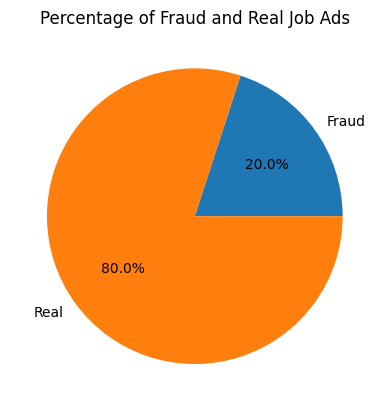

In [95]:
# Count the number of real and fraudulent job ads
fraud_count = balanced_data[balanced_data['fraudulent']==1].shape[0]
real_count = balanced_data[balanced_data['fraudulent']==0].shape[0]

# Create a list of counts and labels for the pie chart
counts = [fraud_count, real_count]
labels = ['Fraud', 'Real']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Real Job Ads')
plt.show()

# Test and Training set perspective

In [96]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = balanced_data.drop('fraudulent', axis=1)
y = balanced_data['fraudulent']

# Use stratified sampling to split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 2. Feature Extraction

## functions we use for Feature Extraction :

In [97]:
def count_words(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    count = len(words)
    return count

### Title features:

#### Title contains (1) words from list of only fraud's title words, or not (0)

In [98]:
fraud_only_title_words = only_fraud_title_words # list of fraud ads title's words 

def check_for_words(title):# check if any of the fraud words are in the given title
    return any(word in str(title).lower() for word in fraud_only_title_words)

balanced_data['title_fraud_words'] = balanced_data['title'].apply(check_for_words).astype(int)

### Company_profile features:

In [99]:
balanced_data['company_profile_length'] = balanced_data['company_profile'].apply(lambda x: len(str(x)))

In [100]:
balanced_data['company_profile_words_amount'] = balanced_data['company_profile'].apply(lambda x: count_words(x))

### Description features:

In [101]:
balanced_data['description_length'] = balanced_data['description'].apply(lambda x: len(str(x)))

In [102]:
balanced_data['description_words_amount'] = balanced_data['description'].apply(lambda x: count_words(x))

### Requirements features:

In [103]:
balanced_data['requirements_length'] = balanced_data['requirements'].apply(lambda x: len(str(x)))

In [104]:
balanced_data['requirements_words_amount'] = balanced_data['requirements'].apply(lambda x: count_words(x))

### Benefits features:

In [105]:
balanced_data['benefits_length'] = balanced_data['benefits'].apply(lambda x: len(str(x)))

In [106]:
balanced_data['benefits_words_amount'] = balanced_data['benefits'].apply(lambda x: count_words(x))

In [107]:
balanced_data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,salary_range_small,title_fraud_words,company_profile_length,company_profile_words_amount,description_length,description_words_amount,requirements_length,requirements_words_amount,benefits_length,benefits_words_amount
10585,12968,Bilingual Sales Professional - Spanish/English,Americas,Unknown,medium,"WDM Group is an innovative, forward thinking d...",WDM Group is seeking a top level RELATIONSHIP ...,Are you who were are looking for????MONEY MOTI...,"Base Salary – $33,280 with increase based on j...",0,...,0,0,869,82,216,24,1435,123,517,56
1506,11081,Software Engineer - OptionsAway,Americas,OptionsAway,large,The story of the Great Chicago Fire of 1871 is...,"ABOUT USOptionsAway, an 1871 Member company, i...",QUALIFICATIONS* Top producer of quality server...,,0,...,0,0,1344,118,1055,92,569,60,0,0
4230,5265,Manchester Business Admin Apprenticeship Under...,EMEA,Unknown,Unknown,Established on the principles that full time e...,Government funding is only available for 16-18...,16-18 year olds only due to government funding...,Career prospects.,0,...,0,1,829,72,639,57,70,8,17,2
9779,4655,Part Time Creative Project Manager,Americas,Unknown,Unknown,NoSleepForSheep is a Nashville-based creative ...,Are you passionate about making people happy a...,1+ year project management experienceException...,Flexible schedule.Opportunity to work with a s...,0,...,0,0,300,26,1337,124,436,37,149,17
3448,2784,TV Master Control Technician,Americas,Unknown,Unknown,Applied Memetics LLC is a professional service...,The TV Master Control Technician shall properl...,The TV Master Control Technician shall be expe...,,0,...,0,0,1247,114,243,25,1406,148,0,0


# 3. Feature Representation

###  normalize all numeric values to [0-1] scale by dividing in the max value:

In [108]:
max_company_profile_length = balanced_data['company_profile_length'].max()
balanced_data['company_profile_length'] = balanced_data['company_profile_length'] / max_company_profile_length

In [109]:
max_company_profile_words_amount = balanced_data['company_profile_words_amount'].max()
balanced_data['company_profile_words_amount'] = balanced_data['company_profile_words_amount'] / max_company_profile_words_amount

In [110]:
max_description_length = balanced_data['description_length'].max()
balanced_data['description_length'] = balanced_data['description_length'] / max_description_length

In [111]:
max_description_words_amount = balanced_data['description_words_amount'].max()
balanced_data['description_words_amount'] = balanced_data['description_words_amount'] / max_description_words_amount

In [112]:
max_requirements_length = balanced_data['requirements_length'].max()
balanced_data['requirements_length'] = balanced_data['requirements_length'] / max_requirements_length

In [113]:
max_requirements_words_amount = balanced_data['requirements_words_amount'].max()
balanced_data['requirements_words_amount'] = balanced_data['requirements_words_amount'] / max_requirements_words_amount

In [114]:
max_benefits_length = balanced_data['benefits_length'].max()
balanced_data['benefits_length'] = balanced_data['benefits_length'] / max_benefits_length

In [115]:
max_benefits_words_amount = balanced_data['benefits_words_amount'].max()
balanced_data['benefits_words_amount'] = balanced_data['benefits_words_amount'] / max_benefits_words_amount

In [116]:
balanced_data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,salary_range_small,title_fraud_words,company_profile_length,company_profile_words_amount,description_length,description_words_amount,requirements_length,requirements_words_amount,benefits_length,benefits_words_amount
10585,12968,Bilingual Sales Professional - Spanish/English,Americas,Unknown,medium,"WDM Group is an innovative, forward thinking d...",WDM Group is seeking a top level RELATIONSHIP ...,Are you who were are looking for????MONEY MOTI...,"Base Salary – $33,280 with increase based on j...",0,...,0,0,0.140660,0.145133,0.014490,0.016913,0.225771,0.201309,0.116731,0.131765
1506,11081,Software Engineer - OptionsAway,Americas,OptionsAway,large,The story of the Great Chicago Fire of 1871 is...,"ABOUT USOptionsAway, an 1871 Member company, i...",QUALIFICATIONS* Top producer of quality server...,,0,...,0,0,0.217546,0.208850,0.070772,0.064834,0.089522,0.098200,0.000000,0.000000
4230,5265,Manchester Business Admin Apprenticeship Under...,EMEA,Unknown,Unknown,Established on the principles that full time e...,Government funding is only available for 16-18...,16-18 year olds only due to government funding...,Career prospects.,0,...,0,1,0.134186,0.127434,0.042866,0.040169,0.011013,0.013093,0.003838,0.004706
9779,4655,Part Time Creative Project Manager,Americas,Unknown,Unknown,NoSleepForSheep is a Nashville-based creative ...,Are you passionate about making people happy a...,1+ year project management experienceException...,Flexible schedule.Opportunity to work with a s...,0,...,0,0,0.048559,0.046018,0.089689,0.087385,0.068597,0.060556,0.033642,0.040000
3448,2784,TV Master Control Technician,Americas,Unknown,Unknown,Applied Memetics LLC is a professional service...,The TV Master Control Technician shall properl...,The TV Master Control Technician shall be expe...,,0,...,0,0,0.201845,0.201770,0.016301,0.017618,0.221208,0.242226,0.000000,0.000000


# 4. Feature Selection

In [117]:
df_selected = balanced_data.drop(['job_id'], axis=1)
df_selected = df_selected.drop(['title'], axis=1)
df_selected = df_selected.drop(['location'], axis=1)
df_selected = df_selected.drop(['department'], axis=1)
df_selected = df_selected.drop(['description'], axis=1)
df_selected = df_selected.drop(['requirements'], axis=1)
df_selected = df_selected.drop(['benefits'], axis=1)
df_selected = df_selected.drop(['salary_range'], axis=1)
df_selected = df_selected.drop(['company_profile'], axis=1)
df_selected = df_selected.drop(['required_education'], axis=1)
df_selected = df_selected.drop(['function'], axis=1)
df_selected = df_selected.drop(['employment_type'], axis=1)
df_selected = df_selected.drop(['industry'], axis=1)
df_selected = df_selected.drop(['required_experience'], axis=1)

In [118]:
df_selected

,telecommuting,has_company_logo,has_questions,fraudulent,location_APAC,location_Africa,location_Americas,location_EMEA,location_Unknown,employment_type_Contract,...,salary_range_small,title_fraud_words,company_profile_length,company_profile_words_amount,description_length,description_words_amount,requirements_length,requirements_words_amount,benefits_length,benefits_words_amount
10585,0,1,0,0,0,0,1,0,0,0,...,0,0,0.140660,0.145133,0.014490,0.016913,0.225771,0.201309,0.116731,0.131765
1506,0,1,0,0,0,0,1,0,0,0,...,0,0,0.217546,0.208850,0.070772,0.064834,0.089522,0.098200,0.000000,0.000000
4230,0,1,1,0,0,0,0,1,0,0,...,0,1,0.134186,0.127434,0.042866,0.040169,0.011013,0.013093,0.003838,0.004706
9779,0,1,1,0,0,0,1,0,0,0,...,0,0,0.048559,0.046018,0.089689,0.087385,0.068597,0.060556,0.033642,0.040000
3448,0,1,0,0,0,0,1,0,0,0,...,0,0,0.201845,0.201770,0.016301,0.017618,0.221208,0.242226,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,0,1,1,0,0,0,0,1,0,0,...,0,0,0.099223,0.097345,0.159522,0.149401,0.058999,0.062193,0.271845,0.272941
5305,0,0,1,1,0,0,1,0,0,0,...,0,0,0.230172,0.238938,0.026431,0.031712,0.329767,0.335516,0.216527,0.242353
13332,0,1,1,0,0,0,1,0,0,0,...,0,0,0.097604,0.107965,0.179580,0.193094,0.052549,0.052373,0.200045,0.195294
190,0,1,1,0,0,0,1,0,0,1,...,0,0,0.008579,0.014159,0.021064,0.030303,0.021397,0.021277,0.004290,0.007059


<Axes: >

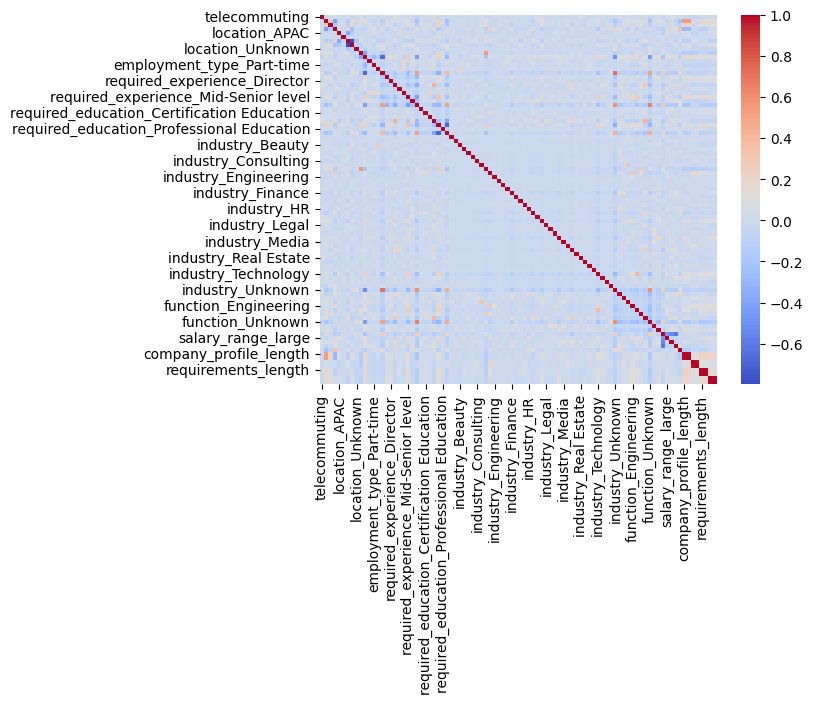

In [119]:
corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

In [120]:
corr_table = corr_matrix.style.background_gradient(cmap='coolwarm')
display(corr_table)

,telecommuting,has_company_logo,has_questions,fraudulent,location_APAC,location_Africa,location_Americas,location_EMEA,location_Unknown,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown,required_experience_Associate,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_Unknown,required_education_Associate Education,required_education_Certification Education,required_education_College Education,required_education_High School Education,required_education_Higher Education,required_education_Professional Education,required_education_Unknown,industry_Architecture,industry_Automotive,industry_Beauty,industry_Biotech,industry_Business,industry_Construction,industry_Consulting,industry_Design,industry_Education,industry_Energy,industry_Engineering,industry_Environment,industry_Events,industry_Fashion,industry_Finance,industry_Food,industry_Gaming,industry_Government,industry_HR,industry_Healthcare,industry_Insurance,industry_Internet,industry_Legal,industry_Logistics,industry_Manufacturing,industry_Marketing,industry_Media,industry_Nonprofit,industry_Other Services,industry_Printing,industry_Real Estate,industry_Research,industry_Retail,industry_Security,industry_Technology,industry_Telecom,industry_Transportation,industry_Travel,industry_Unknown,function_Admin,function_Business,function_Creative,function_Engineering,function_IT and Data,function_Other


In [121]:
# compute the correlation coefficients between all variables and the target variable "fraudulent"
corr_with_target = df_selected.corrwith(df_selected['fraudulent']).sort_values(ascending=False)

# create a styled table of the correlation coefficients
corr_table = pd.DataFrame(corr_with_target, columns=['Correlation Coefficient fraudulent'])
corr_table.style.background_gradient(cmap='coolwarm')

,Correlation Coefficient fraudulent
fraudulent,1.000000
title_fraud_words,0.333672
industry_Energy,0.247968
location_Americas,0.204602
function_Admin,0.139958
required_education_High School Education,0.137680
salary_range_small,0.101326
industry_Travel,0.099908
required_experience_Unknown,0.087949
function_Engineering,0.085015


In [122]:
feature_corr_threshold = 0.5
high_corr_features = set()

corr_with_target = df_selected.corrwith(df_selected['fraudulent']).sort_values(ascending=False) # correlation between all features and fraudulent(target)
corr_matrix = df_selected.corr() # correlation between features

for col in corr_matrix.columns:
    for idx, val in enumerate(corr_matrix[col]):
        if abs(val) > feature_corr_threshold and idx > corr_matrix.columns.get_loc(col):
            if abs(val) > 0.5:
                if corr_with_target[col] > corr_with_target[corr_matrix.columns[idx]]:
                    high_corr_features.add(col)
                else:
                    high_corr_features.add(corr_matrix.columns[idx])


features_to_remove = list(high_corr_features)
df_selected = df_selected.drop(features_to_remove, axis=1)


In [123]:
df_selected.shape

(16733, 79)

In [124]:
df_selected.head(5)

,telecommuting,has_company_logo,has_questions,fraudulent,location_APAC,location_Africa,location_EMEA,location_Unknown,employment_type_Full-time,employment_type_Other,...,function_Services,function_Unknown,function_production,function_sales and marketing,salary_range_Unknown,salary_range_large,title_fraud_words,description_length,requirements_length,benefits_length
10585,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.014490,0.225771,0.116731
1506,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0.070772,0.089522,0.000000
4230,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0.042866,0.011013,0.003838
9779,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.089689,0.068597,0.033642
3448,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.016301,0.221208,0.000000
